In [76]:
##Hackton organized by American Association of Petroleum geologists (AAPG) in Houston on July 2018
#Given a dataset of oil,gas, and water production (volve_oil) containing both monthly and daily productions.
#Final Goal is to apply LSTM on this dataset and predict the production 
##given the parameters measured during production

In [75]:
import pandas as pd
import numpy as np
import json
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_Day = pd.read_excel('Volve_production_data.xlsx',sheet_name = 'Daily Production Data')
df_Day.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [3]:
#Loading the dataset- monthly
df_Month = pd.read_excel('Volve_production_data.xlsx',sheet_name = 'Monthly Production Data')
df_Month.head()

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,NaN,NaN,NaN,NaN,hrs,Sm3,Sm3,Sm3,Sm3,Sm3
1,15/9-F-1 C,7405.0,2014.0,4.0,227.5,11142.5,1.59794e+06,0,NaN,NaN
2,15/9-F-1 C,7405.0,2014.0,5.0,733.833,24902,3.49623e+06,783.48,NaN,NaN
3,15/9-F-1 C,7405.0,2014.0,6.0,705.917,19617.8,2.88666e+06,2068.48,NaN,NaN
4,15/9-F-1 C,7405.0,2014.0,7.0,742.417,15085.7,2.24937e+06,6243.98,NaN,NaN


In [8]:
print(df_Day.shape)

(15634, 24)


In [4]:
print(df_Month.shape)

(527, 10)


In [9]:
print(df_Day.columns)

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')


In [10]:
df_Day.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [11]:
#Drop data columns that are  not necessary
dff = df_Day.drop(['BORE_WI_VOL','NPD_WELL_BORE_CODE','NPD_FIELD_CODE','NPD_FACILITY_CODE'], axis = 1, inplace = False)
dff.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_NAME,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,0.00000,0.00000,0.00000,0.0,0.000000,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,production,WI
1,2014-04-08,NO 15/9-F-1 C,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,1.003059,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,production,OP
2,2014-04-09,NO 15/9-F-1 C,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,0.979008,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,production,OP
3,2014-04-10,NO 15/9-F-1 C,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,0.545759,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,production,OP
4,2014-04-11,NO 15/9-F-1 C,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,310.37614,96.87589,277.27826,0.0,1.215987,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,production,OP


In [4]:
#Drop nan values in dff
dff.dropna(inplace = True)

In [5]:
print(dff.shape)

(7504, 20)


In [11]:
#print(dff['ON_STREAM_HRS'])
dff.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_NAME,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,0.00000,0.00000,0.00000,0.0,0.000000,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,production,WI
4,2014-04-11,NO 15/9-F-1 C,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,310.37614,96.87589,277.27826,0.0,1.215987,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,production,OP
5,2014-04-12,NO 15/9-F-1 C,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,303.50078,96.92339,281.44744,0.0,3.087015,%,22.05334,8.70429,22.05334,0.0,0.0,0.0,production,OP
6,2014-04-13,NO 15/9-F-1 C,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,303.53481,96.95885,276.03200,0.0,1.962365,%,27.50281,9.42315,16.16326,0.0,0.0,0.0,production,OP
7,2014-04-14,NO 15/9-F-1 C,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,303.78228,96.96873,282.78676,0.0,0.000000,%,20.99552,8.13137,20.73712,0.0,0.0,0.0,production,OP


In [6]:
#dff.info()  #dff.tail()
## TAKE A LOOK AT ONE WELL
#select rows with a given code
dff1 = dff.loc[dff['WELL_BORE_CODE'] == 'NO 15/9-F-1 C']

In [20]:
#dff1.head()

In [8]:
#Select certain columns from dff1
#Extract only the needed columns from the well
#dff1.corr()
dff1P = dff1.loc[:,['AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_DOWNHOLE_TEMPERATURE','DP_CHOKE_SIZE']]
dff1P

,AVG_DOWNHOLE_PRESSURE,AVG_DP_TUBING,AVG_DOWNHOLE_TEMPERATURE,DP_CHOKE_SIZE
0,0.000000,0.000000,0.000000,0.000000
4,310.376140,277.278260,96.875890,33.071950
5,303.500780,281.447440,96.923390,22.053340
6,303.534810,276.032000,96.958850,16.163260
7,303.782280,282.786760,96.968730,20.737120
8,303.858210,289.940670,97.021360,12.181530
9,303.791870,299.671930,97.065690,1.490200
10,304.335180,282.901000,96.919460,18.794840
11,304.848590,273.700730,96.720340,28.502580
12,305.371490,259.619930,96.615630,43.157100


In [9]:
#Drop outliers NB: Visualize using scatter before you decide which to drop
dff1P.drop([0],axis = 0, inplace = True)
dff1P.drop([745],axis = 0, inplace = True)
dff1P

,AVG_DOWNHOLE_PRESSURE,AVG_DP_TUBING,AVG_DOWNHOLE_TEMPERATURE,DP_CHOKE_SIZE
4,310.376140,277.278260,96.875890,33.071950
5,303.500780,281.447440,96.923390,22.053340
6,303.534810,276.032000,96.958850,16.163260
7,303.782280,282.786760,96.968730,20.737120
8,303.858210,289.940670,97.021360,12.181530
9,303.791870,299.671930,97.065690,1.490200
10,304.335180,282.901000,96.919460,18.794840
11,304.848590,273.700730,96.720340,28.502580
12,305.371490,259.619930,96.615630,43.157100
13,313.870580,282.814360,96.559530,28.484020


In [16]:
#Set a particular column as index if you want
#dff1P.set_index('AVG_DP_TUBING',inplace = True)
#dff1P.head()

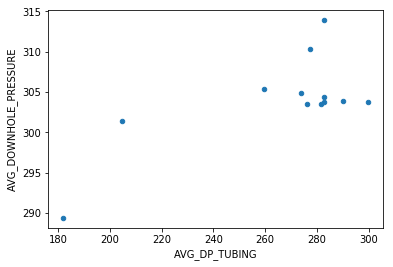

In [10]:
#SactterPlots
#dff3 = dff1P.loc[:,['AVG_DP_TUBING','AVG_DOWNHOLE_PRESSURE']]
dff1P.loc[:,['AVG_DP_TUBING','AVG_DOWNHOLE_PRESSURE']].plot(kind = 'scatter', x = 'AVG_DP_TUBING', y = 'AVG_DOWNHOLE_PRESSURE')
#dff1P.plot(dff1P.loc[:,['AVG_DP_TUBING']], dff1P.loc[:,['AVG_DOWNHOLE_PRESSURE']])
plt.show()
#dff3.head()

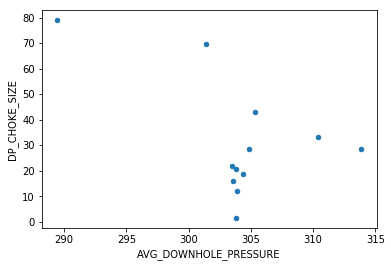

In [12]:
#ScatterPlots
#dff3 = dff1P.loc[:,['AVG_DP_TUBING','AVG_DOWNHOLE_PRESSURE']]
dff1P.loc[:,['AVG_DOWNHOLE_PRESSURE','DP_CHOKE_SIZE']].plot(kind = 'scatter', x = 'AVG_DOWNHOLE_PRESSURE', y = 'DP_CHOKE_SIZE')
#dff1P.plot(dff1P.loc[:,['AVG_DP_TUBING']], dff1P.loc[:,['AVG_DOWNHOLE_PRESSURE']])
plt.show()
#dff3.head()

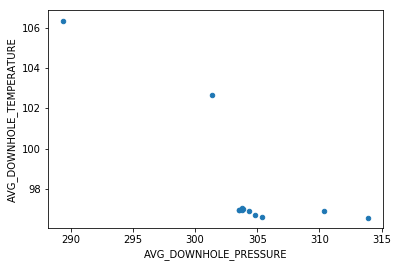

In [41]:
#RegressionLinePlots
#dff3 = dff1P.loc[:,['AVG_DP_TUBING','AVG_DOWNHOLE_PRESSURE']]
dff1P.loc[:,['AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE']].plot(kind = 'scatter', x = 'AVG_DOWNHOLE_PRESSURE', y = 'AVG_DOWNHOLE_TEMPERATURE')
#dff1P.plot(dff1P.loc[:,['AVG_DP_TUBING']], dff1P.loc[:,['AVG_DOWNHOLE_PRESSURE']])
plt.show()
#dff3.head()

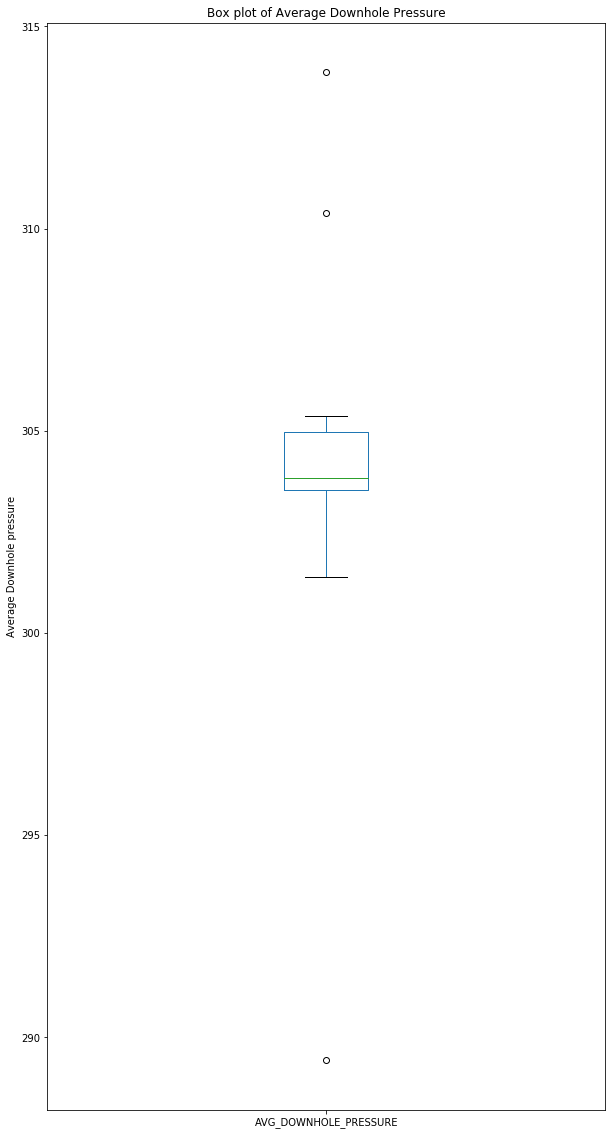

In [25]:
#Bx plot for each column
dff1P.loc[:,['AVG_DOWNHOLE_PRESSURE']].plot(kind = 'box', figsize=(10,20))
#ff1P.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Average Downhole Pressure')
plt.ylabel('Average Downhole pressure')

plt.show()

C:\Users\HILLARY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


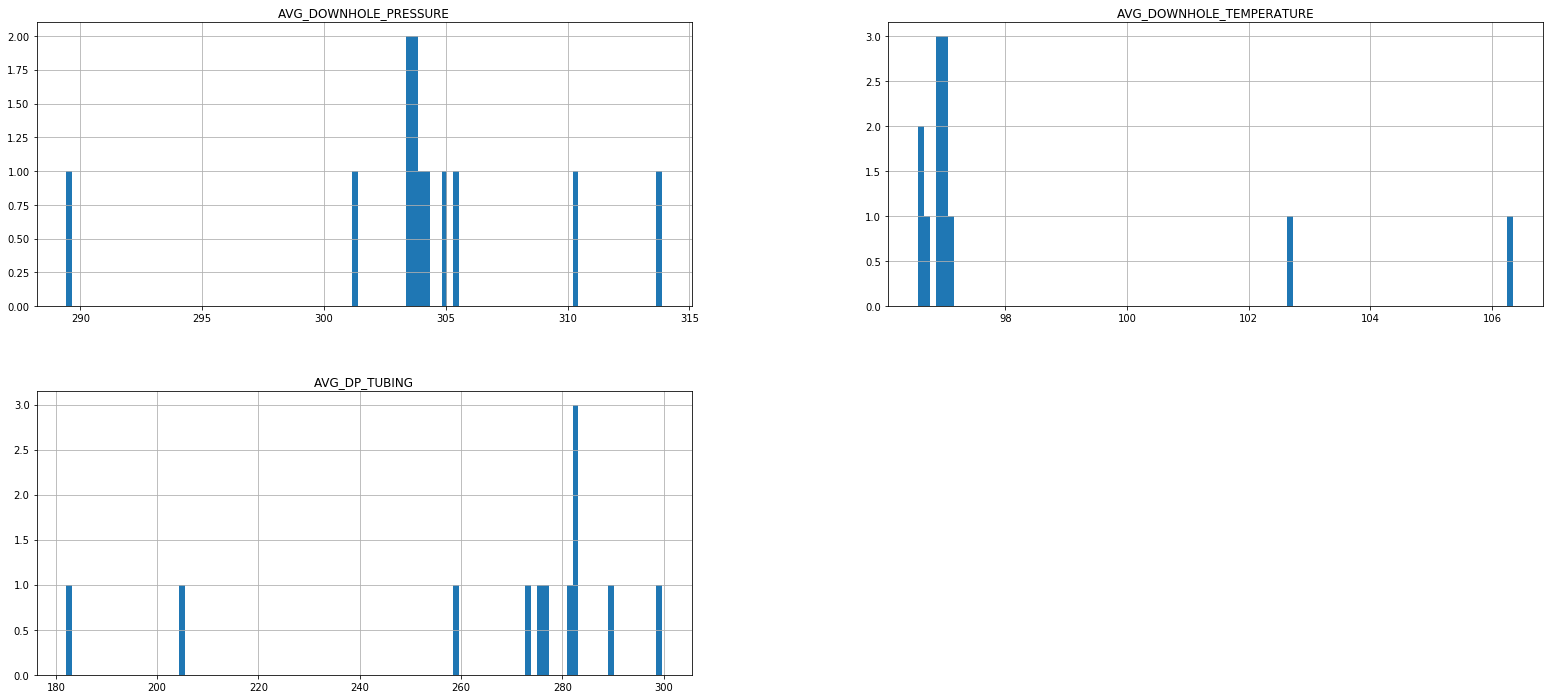

In [12]:
#Histogram for each column
plt.figure(figsize = (27,12))
ax = plt.gca()
dff1P.hist(ax = ax, bins = 100)
plt.show()
#plt.plot(kind = 'scatter', )

In [12]:
##Now work on the monthly production dataset 

In [16]:
df_Month.head()

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,NaN,NaN,NaN,NaN,hrs,Sm3,Sm3,Sm3,Sm3,Sm3
1,15/9-F-1 C,7405.0,2014.0,4.0,227.5,11142.5,1.59794e+06,0,NaN,NaN
2,15/9-F-1 C,7405.0,2014.0,5.0,733.833,24902,3.49623e+06,783.48,NaN,NaN
3,15/9-F-1 C,7405.0,2014.0,6.0,705.917,19617.8,2.88666e+06,2068.48,NaN,NaN
4,15/9-F-1 C,7405.0,2014.0,7.0,742.417,15085.7,2.24937e+06,6243.98,NaN,NaN


In [14]:
print(df_Month.shape)

(527, 10)


In [13]:
df_Month.isnull().sum()##find out the number of null values in each column

Wellbore name      1
NPDCode            1
Year               1
Month              1
On Stream         11
Oil              215
Gas              215
Water            215
GI               526
WI               325
dtype: int64

In [5]:
##Drop the unnecessary columns/select the columns needed
dff_M = df_Month.drop(['GI','WI'], axis = 1, inplace = False)
dff_M.head()

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water
0,NaN,NaN,NaN,NaN,hrs,Sm3,Sm3,Sm3
1,15/9-F-1 C,7405.0,2014.0,4.0,227.5,11142.5,1.59794e+06,0
2,15/9-F-1 C,7405.0,2014.0,5.0,733.833,24902,3.49623e+06,783.48
3,15/9-F-1 C,7405.0,2014.0,6.0,705.917,19617.8,2.88666e+06,2068.48
4,15/9-F-1 C,7405.0,2014.0,7.0,742.417,15085.7,2.24937e+06,6243.98


In [6]:
##Work on the oil production 
##Remove the rows with nan values in the Monthly oil production. Also remove the Gas and Water columns.
dff_MO = dff_M.drop(['Gas','Water'],axis = 1, inplace = False)
dff_MO.dropna(inplace = True)#Drop nan values in dff_MO
dff_MO.head()

,Wellbore name,NPDCode,Year,Month,On Stream,Oil
1,15/9-F-1 C,7405.0,2014.0,4.0,227.5,11142.5
2,15/9-F-1 C,7405.0,2014.0,5.0,733.833,24902
3,15/9-F-1 C,7405.0,2014.0,6.0,705.917,19617.8
4,15/9-F-1 C,7405.0,2014.0,7.0,742.417,15085.7
5,15/9-F-1 C,7405.0,2014.0,8.0,432.992,6970.43


In [24]:
#set the welbore name as the index to help pull out certain well bore. #reset if you want
dff_MO.reset_index('Wellbore name',inplace = True)

In [118]:
dff_MO.head()##Just in case you want to see

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,day,Date
1,15/9-F-1 C,7405.0,2014.0,4.0,227.5,11142.5,1,2014-04-01
2,15/9-F-1 C,7405.0,2014.0,5.0,733.833,24902,1,2014-05-01
3,15/9-F-1 C,7405.0,2014.0,6.0,705.917,19617.8,1,2014-06-01
4,15/9-F-1 C,7405.0,2014.0,7.0,742.417,15085.7,1,2014-07-01
5,15/9-F-1 C,7405.0,2014.0,8.0,432.992,6970.43,1,2014-08-01


In [96]:
#dffM1.head()##Just in case you want to see

In [41]:
print(dffM1.shape)

(25, 6)


In [77]:
dffM1['On Stream'] = dffM1['On Stream'].astype(int) #convert column type to int

C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
import calendar
dffM1['Month'] = dffM1['Month'].apply(lambda x: calendar.month_abbr[x])

C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
#dff_MO

In [92]:
dff_MO = dff_MO.assign(day = 1)#Just to assign a day column in the dataframe
dff_MO['Date'] = pd.to_datetime(dff_MO.loc[:,['Year','Month','day']])#Create a column of date coombining year month and day

In [102]:
dffM12 = dffM1.loc[:,['Oil','On Stream','Date']]#Select columns of interest
dffM12.set_index('Date', inplace = True)#set date as index

In [110]:
dffM12.rename(columns ={'On Stream':'On Stream Hours'},inplace = True)

In [51]:
#dffM12 = dffM1.loc[:,['Oil','On Stream']]

In [47]:
#dffM12.set_index('Month', inplace = True)

In [99]:
dffM12.index = dffM12.index.astype(int)

In [ ]:
#from collections import namedtuple
#MyDate = namedtuple()

In [70]:
#dffM12
##Take a look as the time series variation of oil production
##Find out if there is a trend/repeated pattern

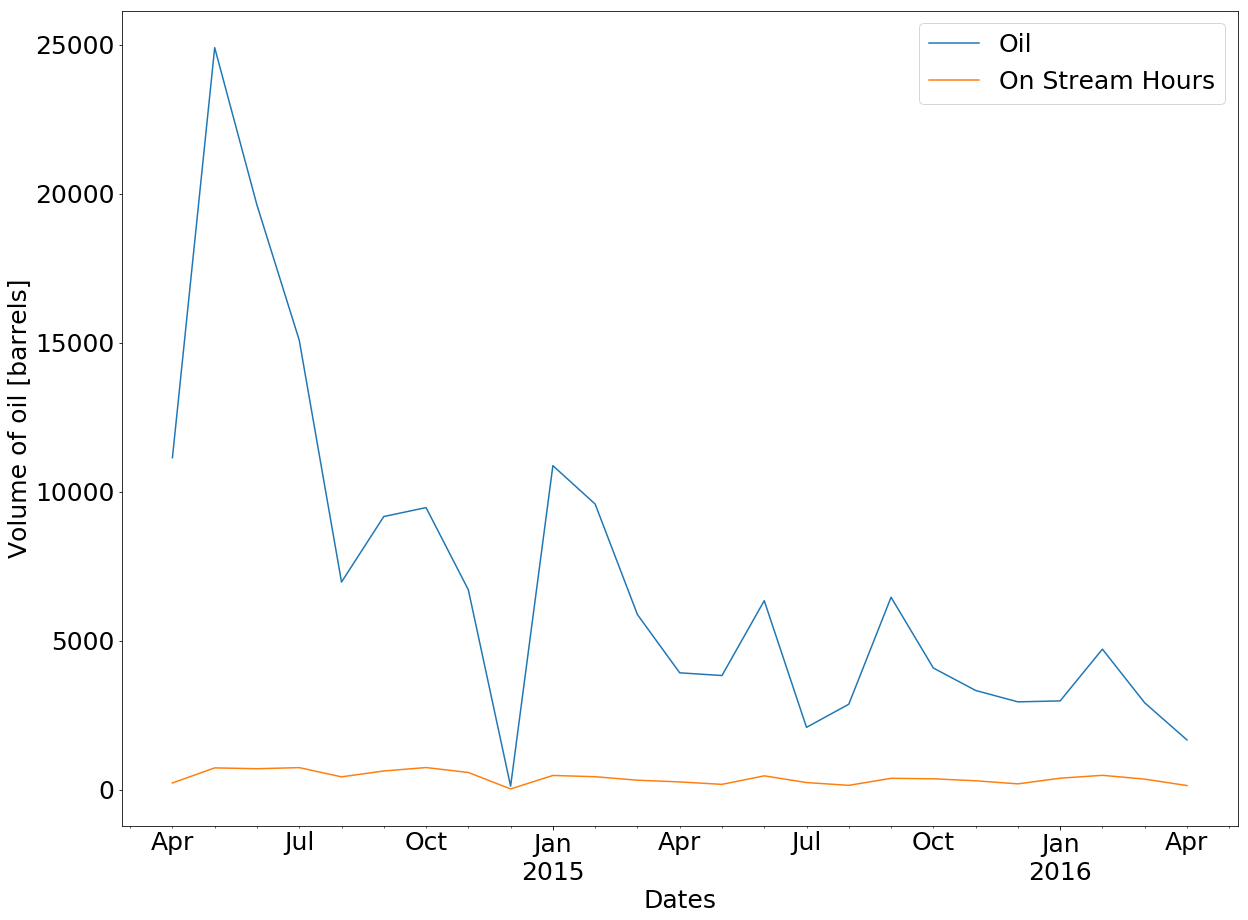

In [148]:
dffM12.plot(kind = 'line', figsize = (20,15))
plt.ylabel('Volume of oil [barrels]',fontsize = 25)
plt.xlabel('Dates',fontsize = 25)
#plt.legend(['Views added'])
plt.rc('font',size = 25)
plt.show()

In [ ]:
##Take a separate look at the different wells 

In [129]:
dff_MO = dff_MO.loc[:,['Wellbore name','NPDCode','Oil','Date']]#Select columns of interest

In [130]:
WellC_list = dff_MO['Wellbore name'].unique().tolist()#Get the list of wells in the dataset

<Figure size 1944x864 with 0 Axes>

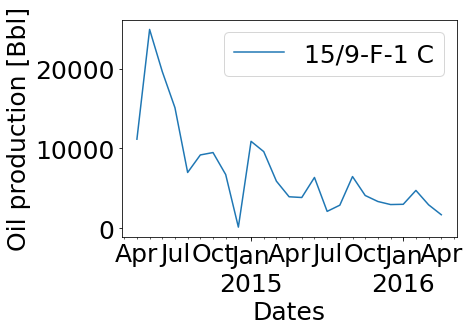

<Figure size 1944x864 with 0 Axes>

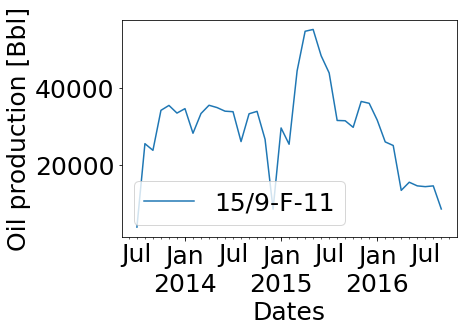

<Figure size 1944x864 with 0 Axes>

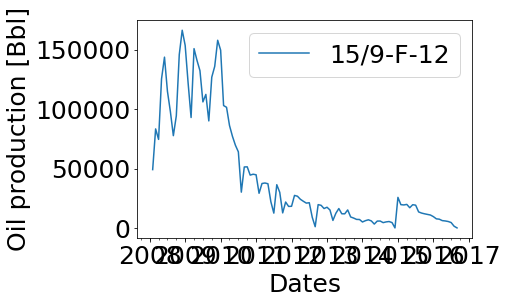

<Figure size 1944x864 with 0 Axes>

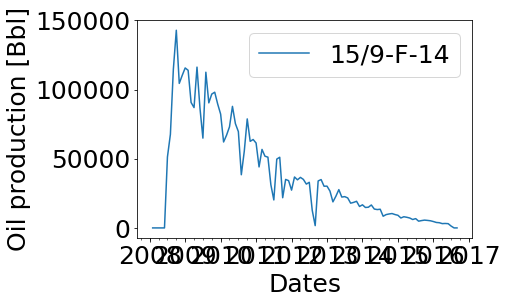

<Figure size 1944x864 with 0 Axes>

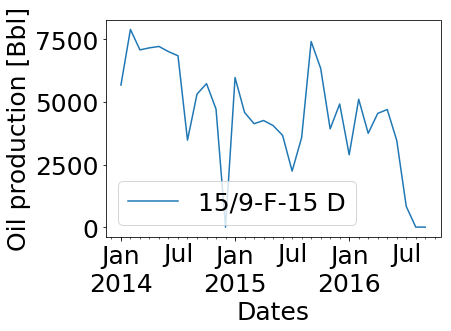

<Figure size 1944x864 with 0 Axes>

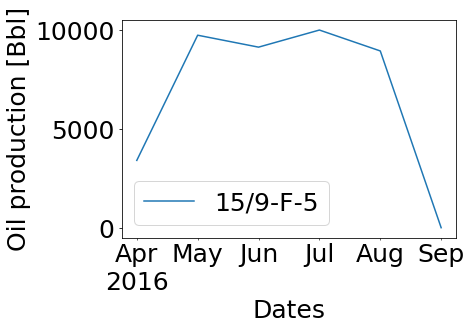

In [147]:
df = {}
for i in WellC_list:
    hy = i
    df[hy] = dff_MO.loc[dff_MO['Wellbore name'] == i]
    df[hy] = df[hy].loc[:,['Oil','Date']].set_index('Date',inplace = False)
    plt.figure(figsize=(27, 12))
    #plt.subplot(len(gy),1,j+1)
    df[hy].plot(kind = 'line')
    plt.ylabel('Oil production [Bbl]',fontsize = 25)
    plt.xlabel('Dates',fontsize = 25)
    plt.legend([hy])
plt.rc('font',size = 25)
plt.show()

<Figure size 2160x1080 with 0 Axes>

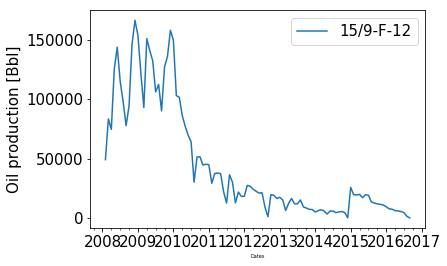

In [157]:
plt.figure(figsize=(30, 15))
df['15/9-F-12'].plot(kind = 'line')
plt.ylabel('Oil production [Bbl]',fontsize = 15)
plt.xlabel('Dates',fontsize = 5)
plt.legend(['15/9-F-12'])
#plt.rc('font',size = 15)
plt.show()

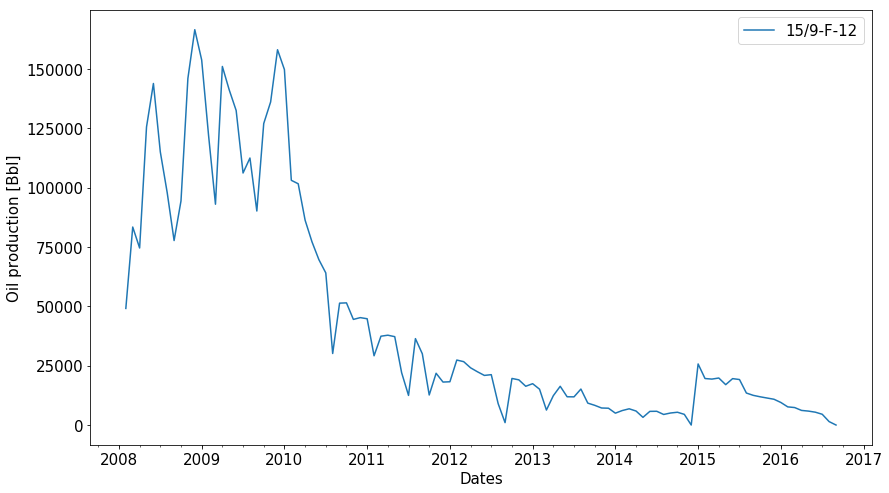

In [160]:
#plt.figure(figsize=(30, 15))
##Blow out the well '15/9-F-12'
df['15/9-F-12'].plot(kind = 'line',figsize=(14, 8))
plt.ylabel('Oil production [Bbl]',fontsize = 15)
plt.xlabel('Dates',fontsize = 15)
plt.legend(['15/9-F-12'])
#plt.rc('font',size = 15)
plt.show()

In [128]:
Well_list

['15/9-F-1 C',
 '15/9-F-11',
 '15/9-F-12',
 '15/9-F-14',
 '15/9-F-15 D',
 '15/9-F-5']

In [64]:
#Do this visualization for all the well bore
df_(15/9-F-1 C) = dff_MO.loc[dff_MO['Wellbore name'] == '15/9-F-1 C']
dffM1 = dff_MO.loc[dff_MO['Wellbore name'] == '15/9-F-1 C']
dffM1 = dff_MO.loc[dff_MO['Wellbore name'] == '15/9-F-1 C']

In [119]:
u = 're'
gy = u+'r'

In [120]:
gy

'rer'

Text(0, 0.5, 'Oil production')

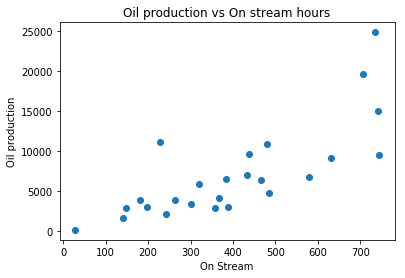

In [69]:
#On stream hours vs Oil production
plt.scatter(x = dffM12['On Stream'],y = dffM12['Oil'])
plt.title('Oil production vs On stream hours')
plt.xlabel('On Stream')
plt.ylabel('Oil production')

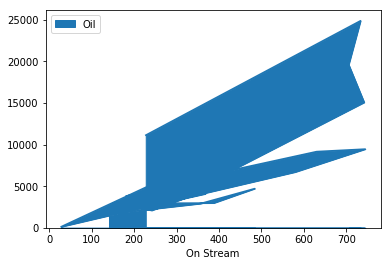

In [59]:
dffM12.plot(kind = 'area', x = 'On Stream', y = 'Oil')

In [71]:
dffM12 = dffM1.loc[:,['Oil','Year']]

In [73]:
dffM12.set_index('Year', inplace = True)

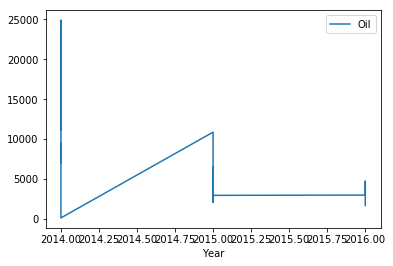

In [74]:
dffM12.plot(kind = 'line')

In [7]:
##convert the year and month into datetime and set it as the index
#dffM1['Date'] = pd.to_datetime(dffM1[['Year','Month']])

In [34]:
#Explore the different columns and find out the unique memebers.
#results show 7 different wellbore id, codes, and names
ud = df.iloc[:,22].unique()
print(ud.shape)
print(df.shape)
print(df.iloc[:,22])

(2,)
(15634, 24)
0        production
1        production
2        production
3        production
4        production
5        production
6        production
7        production
8        production
9        production
10       production
11       production
12       production
13       production
14       production
15       production
16       production
17       production
18       production
19       production
20       production
21       production
22       production
23       production
24       production
25       production
26       production
27       production
28       production
29       production
            ...    
15604    production
15605    production
15606    production
15607    production
15608    production
15609    production
15610    production
15611    production
15612    production
15613    production
15614    production
15615    production
15616    production
15617    production
15618    production
15619    production
15620    production
15621    production
156

In [29]:
NewDF = df.iloc[:,[0,3,5,7,8,9,10,11,12,1,14,15,16,17,18,19,20,21,22,23]]
NewDF.head()

,DATEPRD,NPD_WELL_BORE_NAME,NPD_FIELD_NAME,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,WELL_BORE_CODE,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,0.00000,0.00000,0.00000,0.0,NO 15/9-F-1 C,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,NO 15/9-F-1 C,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,NO 15/9-F-1 C,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,NO 15/9-F-1 C,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,15/9-F-1 C,VOLVE,MÆRSK INSPIRER,0.0,310.37614,96.87589,277.27826,0.0,NO 15/9-F-1 C,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [30]:
X = df.iloc[:,[8,9,10,11,12,1,14,15,16,17,18,19,20,21,22,23]]

In [31]:
X.head()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,WELL_BORE_CODE,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,0.0,0.00000,0.00000,0.00000,0.0,NO 15/9-F-1 C,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,0.0,NaN,NaN,NaN,0.0,NO 15/9-F-1 C,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,0.0,NaN,NaN,NaN,0.0,NO 15/9-F-1 C,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,0.0,NaN,NaN,NaN,0.0,NO 15/9-F-1 C,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,0.0,310.37614,96.87589,277.27826,0.0,NO 15/9-F-1 C,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [32]:
# What is the correlation between variables?
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 3)
correlations = X.corr(method='pearson')
print(correlations)

                          ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
ON_STREAM_HRS                     1.000                 -0.003                     0.106   
AVG_DOWNHOLE_PRESSURE            -0.003                  1.000                     0.968   
AVG_DOWNHOLE_TEMPERATURE          0.106                  0.968                     1.000   
AVG_DP_TUBING                     0.003                  0.950                     0.899   
AVG_ANNULUS_PRESS                 0.483                 -0.124                    -0.087   
AVG_WHP_P                        -0.045                  0.283                     0.274   
AVG_WHT_P                         0.763                 -0.095                    -0.077   
DP_CHOKE_SIZE                    -0.229                  0.268                     0.222   
BORE_OIL_VOL                      0.342                  0.249                     0.290   
BORE_GAS_VOL                      0.354                  0.246                  

In [36]:
df['DATEPRD'] = pd.to_datetime(df['DATEPRD'], format='%y.%d.%m')

In [37]:
df

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000,0.000,...,%,0.000,0.000,0.000,0.00,0.00,0.00,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000,NaN,...,%,0.000,0.000,0.000,0.00,0.00,0.00,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000,NaN,...,%,0.000,0.000,0.000,0.00,0.00,0.00,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000,NaN,...,%,0.000,0.000,0.000,0.00,0.00,0.00,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000,310.376,...,%,33.098,10.480,33.072,0.00,0.00,0.00,NaN,production,OP
5,2014-04-12,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000,303.501,...,%,22.053,8.704,22.053,0.00,0.00,0.00,NaN,production,OP
6,2014-04-13,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000,303.535,...,%,27.503,9.423,16.163,0.00,0.00,0.00,NaN,production,OP
7,2014-04-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000,303.782,...,%,20.996,8.131,20.737,0.00,0.00,0.00,NaN,production,OP
8,2014-04-15,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000,303.858,...,%,13.918,8.498,12.182,0.00,0.00,0.00,NaN,production,OP
9,2014-04-16,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000,303.792,...,%,4.120,8.821,1.490,0.00,0.00,0.00,NaN,production,OP


In [46]:
#Extract only one well data
X1 = X[X['NPD_WELL_BORE_NAME'] == '15/9-F-1 C']

KeyError: 'NPD_WELL_BORE_NAME'

In [40]:
print(X1)

       DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  NPD_FIELD_CODE  \
0   2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
1   2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
2   2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
3   2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
4   2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
5   2014-04-12  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
6   2014-04-13  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
7   2014-04-14  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
8   2014-04-15  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
9   2014-04-16  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
10  2014-04-17  NO 15/9-F-1 C   

In [42]:
X1.dropna()
print(X1)

       DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  NPD_FIELD_CODE  \
0   2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
1   2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
2   2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
3   2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
4   2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
5   2014-04-12  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
6   2014-04-13  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
7   2014-04-14  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
8   2014-04-15  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
9   2014-04-16  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717   
10  2014-04-17  NO 15/9-F-1 C   

In [44]:
#Add production volumes of all products
TotVol = X1['BORE_OIL_VOL']+X1['BORE_GAS_VOL']+X1['BORE_WAT_VOL']

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
5         0.00
6         0.00
7         0.00
8         0.00
9         0.00
10        0.00
11        0.00
12        0.00
13        0.00
14        0.00
15      631.47
16     1166.46
17     1549.81
18     1248.70
19     1345.78
20     1349.56
21     1345.61
22     1279.46
23     1225.62
24     1212.90
25     1074.04
26     1044.17
27      970.20
28      946.12
29     1002.83
        ...   
716     243.92
717     246.84
718     248.04
719     265.31
720     253.28
721     271.68
722     275.74
723     293.43
724     287.42
725     299.49
726     284.72
727     280.17
728     281.93
729     317.38
730     208.00
731       0.00
732       0.00
733       0.00
734       0.00
735       0.00
736       0.00
737       0.00
738       0.00
739       0.00
740       0.00
741       0.00
742       0.00
743       0.00
744       0.00
745       0.00
Name: BORE_OIL_VOL, Length: 746, dtype: float64